In [2]:
!pip install --upgrade --editable ../gym-env

Obtaining file:///C:/Users/shive/OneDrive/Desktop/Sem%205/CS698/ForagingReplenishingPatches/gym-env
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: gym-env
    Found existing installation: gym-env 1.0.0
    Uninstalling gym-env-1.0.0:
      Successfully uninstalled gym-env-1.0.0
  Running setup.py develop for gym-env


In [1]:
import gym
import gym_env
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

env = gym.make('foraging-replenishing-patches-v0')

env.reset()
for i in range(300):
    action = np.random.randint(9)
    state, reward, done, _ = env.step(action)
    print(action, state, reward, done)
    if done:
        break

0 0 0 False
8 0 0 False
1 1 0 False
7 7 0 False
3 3 0 False
2 2 0 False
7 7 0 False
3 3 0 False
8 3 0 False
1 1 0 False
6 6 0 False
7 7 0 False
1 1 0 False
2 2 0 False
8 2 63.0 False
2 2 63.0 False
6 6 63.0 False
6 6 63.0 False
1 1 63.0 False
7 7 63.0 False
8 7 63.0 False
5 5 63.0 False
6 6 63.0 False
1 1 63.0 False
5 5 63.0 False
3 3 63.0 False
8 3 63.0 False
5 5 63.0 False
8 5 63.0 False
5 5 63.0 False
8 5 63.0 False
7 7 63.0 False
4 4 63.0 False
4 4 63.0 False
0 0 63.0 False
2 2 63.0 False
7 7 63.0 False
1 1 63.0 False
1 1 63.0 False
3 3 63.0 False
6 6 63.0 False
8 6 129.60000000000002 False
3 3 129.60000000000002 False
4 4 129.60000000000002 False
0 0 129.60000000000002 False
1 1 129.60000000000002 False
7 7 129.60000000000002 False
0 0 129.60000000000002 False
3 3 129.60000000000002 False
2 2 129.60000000000002 False
8 2 189.90000000000003 False
7 7 189.90000000000003 False
5 5 189.90000000000003 False
1 1 189.90000000000003 False
4 4 189.90000000000003 False
8 4 263.7000000000000

In [2]:
print(env.octagon_points)

[[ 0.00000000e+00  1.30656296e+00]
 [ 9.23879533e-01  9.23879533e-01]
 [ 1.30656296e+00  8.00039076e-17]
 [ 9.23879533e-01 -9.23879533e-01]
 [ 1.60007815e-16 -1.30656296e+00]
 [-9.23879533e-01 -9.23879533e-01]
 [-1.30656296e+00 -2.40011723e-16]
 [-9.23879533e-01  9.23879533e-01]]


[[0.         0.38268343 0.70710678 0.92387953 1.         0.92387953
  0.70710678 0.38268343]
 [0.38268343 0.         0.38268343 0.70710678 0.92387953 1.
  0.92387953 0.70710678]
 [0.70710678 0.38268343 0.         0.38268343 0.70710678 0.92387953
  1.         0.92387953]
 [0.92387953 0.70710678 0.38268343 0.         0.38268343 0.70710678
  0.92387953 1.        ]
 [1.         0.92387953 0.70710678 0.38268343 0.         0.38268343
  0.70710678 0.92387953]
 [0.92387953 1.         0.92387953 0.70710678 0.38268343 0.
  0.38268343 0.70710678]
 [0.70710678 0.92387953 1.         0.92387953 0.70710678 0.38268343
  0.         0.38268343]
 [0.38268343 0.70710678 0.92387953 1.         0.92387953 0.70710678
  0.38268343 0.        ]]


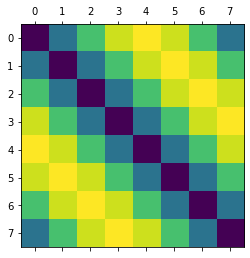

In [3]:
total_sites = len(env.rewards)
distances = np.zeros((total_sites, total_sites))

for i in range(total_sites):
    for j in range(total_sites):
        distances[i, j] = np.linalg.norm(env.octagon_points[i] - env.octagon_points[j])

distances /= np.max(distances)
print(distances)
plt.matshow(distances)
plt.show()

In [20]:
def pureGreedy(env,maxEpisodes, maxTime=300, optimistic=True, distanceFactor=25):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  if optimistic == True:
    Q = np.ones(env.action_space.n-1)*10**4

  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    while env.time_elapsed < maxTime:
        Q -= distanceFactor*distances[env.current_state]
        a = np.random.choice(np.flatnonzero(np.isclose(Q, np.max(Q))))
        Q += distanceFactor*distances[env.current_state]
        s, r, terminal, info = env.step(a)
        s, r, terminal, info = env.step(8)
        N[a] += 1
        Q[a] += (r-reward-Q[a])/N[a]
        reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

In [21]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = pureGreedy(env=genv, maxEpisodes=50, optimistic=True)
print(rs)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [22]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = pureGreedy(env=genv, maxEpisodes=50, optimistic=False)
print(rs)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [23]:
def pureExplore(env,maxEpisodes, maxTime=300, distanceFactor=25):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    while env.time_elapsed < maxTime:
        a = np.random.randint(env.action_space.n-1)
        s, r, terminal, info = env.step(a)
        s, r, terminal, info = env.step(8)
        N[a] += 1
        Q[a] += (r-reward-Q[a])/N[a]
        reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

In [24]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = pureExplore(env=genv, maxEpisodes=50)
print(rs)

[4887.9, 4770.9, 4667.4, 4539.6, 4343.400000000001, 4603.499999999998, 4636.800000000001, 5003.1, 5041.8, 4828.499999999999, 4597.200000000001, 4789.799999999999, 3699.900000000001, 4408.200000000001, 5026.5, 3650.4, 5247.0, 5682.6, 4832.1, 4439.7, 4303.8, 4812.299999999998, 4205.700000000001, 4854.6, 4589.099999999999, 4667.4000000000015, 5425.200000000001, 4180.499999999999, 5498.099999999999, 4255.2, 5038.2, 5304.599999999999, 4835.700000000001, 4731.300000000001, 6036.2999999999965, 4324.499999999999, 3835.7999999999993, 4910.400000000001, 4568.4, 5216.4000000000015, 4432.5, 4807.800000000002, 5562.000000000002, 4972.499999999998, 4978.800000000001, 4662.000000000002, 5706.900000000001, 3716.099999999999, 5038.200000000001, 4033.7999999999997]


In [25]:
def epsGreedy(env,eps, maxEpisodes,maxTime=300, distanceFactor=25):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    while env.time_elapsed < maxTime:
        if np.random.rand(1) < eps:
            a = np.random.randint(env.action_space.n-1)
        else:
            Q -= distanceFactor*distances[env.current_state]
            a = np.random.choice(np.flatnonzero(np.isclose(Q, np.max(Q)))) 
            Q += distanceFactor*distances[env.current_state]   
        s, r, terminal, info = env.step(a)
        s, r, terminal, info = env.step(8)
        N[a] += 1
        Q[a] += (r-reward-Q[a])/N[a]
        reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

In [26]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = epsGreedy(env=genv, eps=0.3, maxEpisodes=50)
print(rs)

[11416.499999999995, 9729.000000000002, 15322.500000000002, 11435.400000000003, 12778.2, 14410.800000000001, 10941.300000000003, 12574.800000000003, 13309.200000000003, 13435.200000000004, 13023.900000000001, 12397.500000000002, 11349.9, 13032.9, 11632.500000000005, 13255.199999999995, 13436.099999999999, 12536.999999999998, 12249.900000000003, 12690.9, 13995.899999999996, 12952.800000000003, 11534.399999999998, 13315.5, 11642.400000000003, 12429.899999999994, 11101.499999999996, 12753.0, 12914.100000000004, 9617.400000000003, 10281.599999999999, 12859.199999999995, 12939.29999999999, 13574.699999999999, 12987.900000000005, 12581.099999999999, 11570.40000000001, 12157.199999999997, 11862.899999999996, 13240.800000000005, 11042.100000000004, 12712.499999999998, 13499.999999999996, 12233.699999999993, 13793.399999999998, 13252.500000000002, 13370.399999999998, 11996.999999999995, 13945.499999999993, 11610.899999999998]


In [4]:
def decEpsGreedy(env,maxEpisodes,eps_start, eps_end, decayType='exponential', maxTime=300, decayTill=200, distanceFactorStart=25, distanceFactorEnd=25):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    while env.time_elapsed < maxTime:
      if decayType == 'linear':
        eps = eps_start + min(decayTill-1,i)*(eps_end-eps_start)/(decayTill-1)
      else:
        eps = eps_start*((eps_end/eps_start)**(min(decayTill-1,i)/(decayTill-1)))

      distanceFactor = distanceFactorStart + (distanceFactorEnd-distanceFactorStart)*(i)/(maxEpisodes-1)
      if np.random.rand(1) < eps:
        a = np.random.randint(env.action_space.n-1)
      else:
        Q -= distanceFactor*distances[env.current_state]
        a = np.random.choice(np.flatnonzero(np.isclose(Q, np.max(Q))))     
        Q += distanceFactor*distances[env.current_state] 
      s, r, terminal, info = env.step(a)
      s, r, terminal, info = env.step(8)
      N[a] += 1
      Q[a] += (r-reward-Q[a])/N[a]
      reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

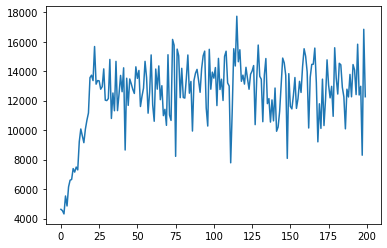

In [13]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
qs,rs = decEpsGreedy(env=genv, maxEpisodes=200, eps_start=1, eps_end=0.1, decayType='linear', decayTill=25, distanceFactorStart=0, distanceFactorEnd=50)
plt.plot(np.arange(200),rs)
plt.show()

100%|██████████| 5/5 [02:59<00:00, 35.83s/it]


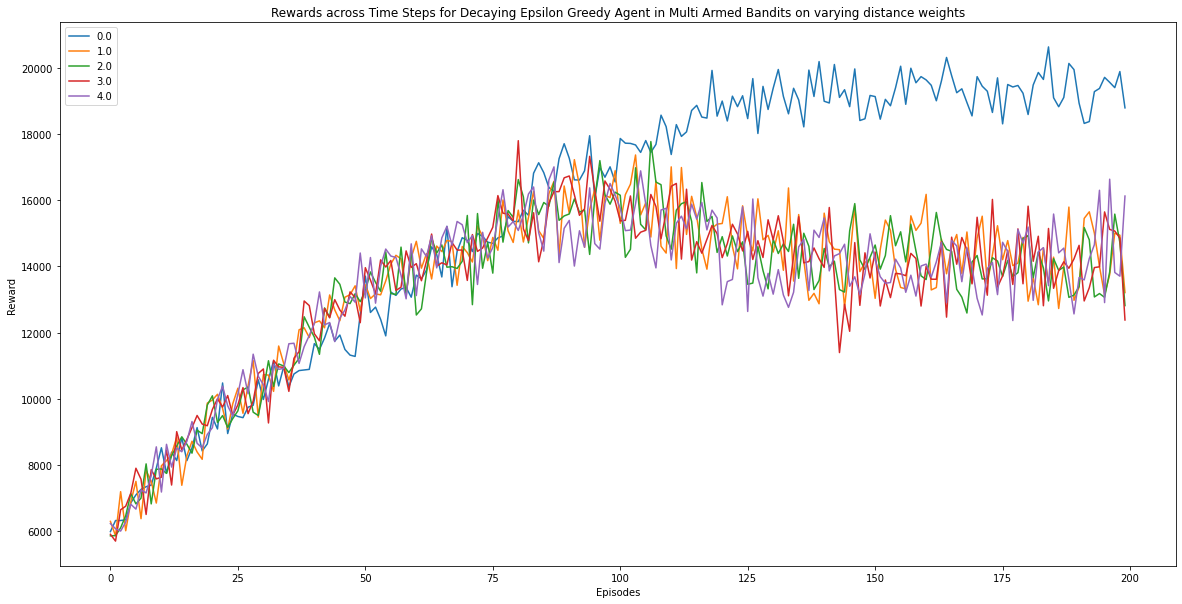

In [14]:
for i in tqdm(range(0,50,10)):
  RS = []
  for _ in range(5):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = decEpsGreedy(env=genv, maxEpisodes=200, eps_start=1, eps_end=0.1, decayType='exponential', maxTime=300, decayTill=125, distanceFactorStart=0, distanceFactorEnd=i)
    RS.append(rs)
  plt.rcParams["figure.figsize"] = (20,10)
  plt.title("Rewards across Time Steps for Decaying Epsilon Greedy Agent in Multi Armed Bandits on varying distance weights")
  plt.xlabel('Episodes')
  plt.ylabel('Reward') 
  plt.plot(np.arange(200), np.mean(RS,axis=0), label=str(i/10))
  plt.legend()

plt.show()

100%|██████████| 10/10 [02:56<00:00, 17.67s/it]


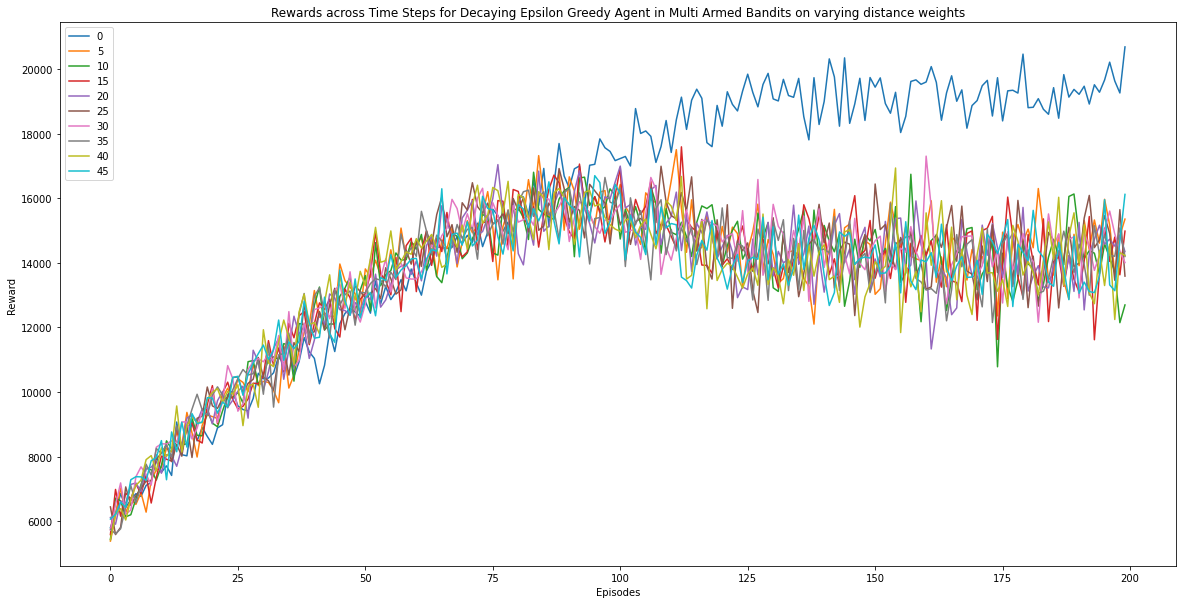

In [46]:
for i in tqdm(range(0,50,5)):
  RS = []
  for _ in range(5):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = decEpsGreedy(env=genv, maxEpisodes=200, eps_start=1, eps_end=0.1, decayType='exponential', maxTime=300, decayTill=125, distanceFactor=i)
    RS.append(rs)
  plt.rcParams["figure.figsize"] = (20,10)
  plt.title("Rewards across Time Steps for Decaying Epsilon Greedy Agent in Multi Armed Bandits on varying distance weights")
  plt.xlabel('Episodes')
  plt.ylabel('Reward') 
  plt.plot(np.arange(200), np.mean(RS,axis=0), label=str(i))
  plt.legend()

plt.show()

In [15]:
def UCB(env, maxEpisodes, c, maxTime=300, distanceFactorStart=25, distanceFactorEnd=25):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    count = 0
    while env.time_elapsed < maxTime:
      if count < env.action_space.n-1:
        a = count
      else:
        distanceFactor = distanceFactorStart + (distanceFactorEnd-distanceFactorStart)*(i)/(maxEpisodes-1)
        U = c*np.sqrt(np.log(i+1)/N) 
        Q -= distanceFactor*distances[env.current_state]
        a = np.random.choice(np.flatnonzero(np.isclose(Q+U, np.max(Q+U))))
        Q += distanceFactor*distances[env.current_state] 
      s, r, terminal, info = env.step(a)
      count += 1
      s, r, terminal, info = env.step(8)

      N[a] += 1
      Q[a] += (r-reward-Q[a])/N[a]
      reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

100%|██████████| 5/5 [02:39<00:00, 31.88s/it]


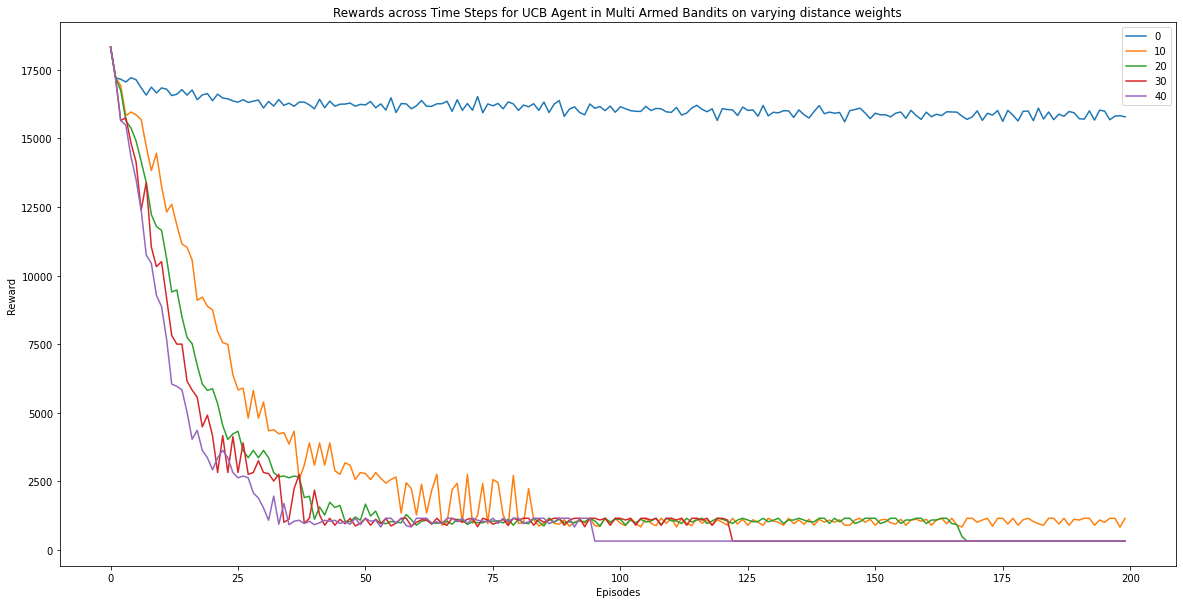

In [17]:
for i in tqdm(range(0,50,10)):
  RS = []
  for _ in range(5):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = UCB(env=genv, maxEpisodes=200, c=0.3, maxTime=300, distanceFactorStart=0, distanceFactorEnd=i)
    RS.append(rs)
  plt.rcParams["figure.figsize"] = (20,10)
  plt.title("Rewards across Time Steps for UCB Agent in Multi Armed Bandits on varying distance weights")
  plt.xlabel('Episodes')
  plt.ylabel('Reward') 
  plt.plot(np.arange(200), np.mean(RS,axis=0), label=str(i))
  plt.legend()

plt.show()

In [45]:
genv = gym.make('foraging-replenishing-patches-v0')
genv.reset()
_,rs = UCB(env=genv, maxEpisodes=50, c=0.3, distanceFactor=0)
print(rs)

[15642.000000000013, 15497.10000000001, 15169.50000000001, 15859.80000000001, 15098.400000000014, 15569.100000000013, 15407.100000000015, 15298.200000000006, 15121.800000000007, 15456.600000000015, 15269.40000000001, 14737.500000000004, 15551.100000000015, 15416.1, 15029.100000000006, 14998.500000000011, 15525.000000000011, 15096.600000000011, 15092.100000000006, 15243.300000000008, 14457.600000000006, 15319.80000000001, 15236.100000000008, 14939.100000000006, 15162.30000000001, 15165.900000000012, 15471.90000000001, 15009.300000000008, 14938.200000000008, 15217.200000000008, 14999.40000000001, 15082.20000000001, 15078.60000000001, 15025.500000000011, 15059.700000000013, 15106.50000000001, 15044.400000000012, 15137.100000000011, 14701.500000000007, 15619.50000000001, 15016.500000000011, 15031.800000000012, 15094.800000000007, 15106.500000000011, 14958.000000000005, 15165.900000000012, 15301.800000000007, 14938.200000000006, 14892.300000000008, 14584.500000000007]


100%|██████████| 10/10 [05:09<00:00, 30.98s/it]


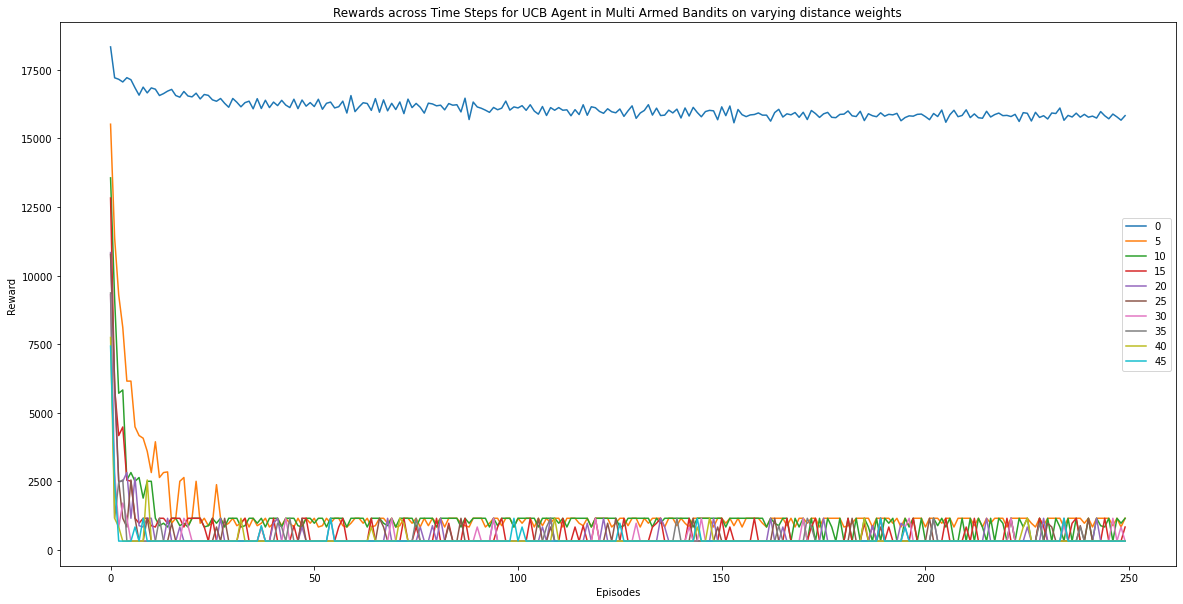

In [48]:
for i in tqdm(range(0,50,5)):
  RS = []
  for _ in range(5):
    genv = gym.make('foraging-replenishing-patches-v0', block_type=3)
    genv.reset()
    _,rs = UCB(env=genv, maxEpisodes=250, c=0.3, maxTime=300, distanceFactor=i)
    RS.append(rs)
  plt.rcParams["figure.figsize"] = (20,10)
  plt.title("Rewards across Time Steps for UCB Agent in Multi Armed Bandits on varying distance weights")
  plt.xlabel('Episodes')
  plt.ylabel('Reward') 
  plt.plot(np.arange(250), np.mean(RS,axis=0), label=str(i))
  plt.legend()

plt.show()

# suggestions
1. time vary distance heuristic (for low time, might matter more how far away), and explore more for initial values
2. distance factory vary with time for UCB

In [14]:
def softMax(env, maxEpisodes, temp_start, temp_end, maxTime=300):
  Q_est = np.zeros((maxEpisodes,env.action_space.n-1))
  rewards = []
  Q = np.zeros(env.action_space.n-1)
  N = np.zeros(env.action_space.n-1)
  
  for i in range(maxEpisodes):
    env.reset()
    reward = 0
    while env.time_elapsed < maxTime:
      temp = temp_start + i*(temp_end-temp_start)/(maxEpisodes-1)
      probs = np.exp(Q/temp)/np.sum(np.exp(Q/temp))
      a = np.random.choice(a=env.action_space.n-1, p=probs)
      s, r, terminal, info = env.step(a)
      s, r, terminal, info = env.step(8)
      N[a] += 1
      Q[a] += (r-reward-Q[a])/N[a]
      reward = r
    rewards.append(reward)
    Q_est[i] = Q
  return Q_est, rewards

In [29]:
def AvgRewardsNGaussianBandits(N=50, episodes=10**3, block_type=3, decayTill=200):
    skipFirstN = 0
    pureGreedy_R = []
    pureExplore_R = []
    epsGreedy_R = []
    decExpEpsGreedy_R = []
    decLinEpsGreedy_R = []
    UCB_R = []
    softMax_R = []

    for i in tqdm(range(N)):
        genv = gym.make('foraging-replenishing-patches-v0', block_type=block_type)
        _,rs = pureGreedy(env=genv, maxEpisodes = episodes)
        pureGreedy_R.append(rs)
        _,rs = pureExplore(env=genv, maxEpisodes=episodes)
        pureExplore_R.append(rs)
        _,rs = epsGreedy(env=genv, maxEpisodes=episodes, eps=0.3)
        epsGreedy_R.append(rs)
        _,rs = decEpsGreedy(env=genv, maxEpisodes=episodes, eps_start=1, eps_end=0.1, decayType='exponential', decayTill=decayTill)
        decExpEpsGreedy_R.append(rs)
        _,rs = decEpsGreedy(env=genv, maxEpisodes=episodes, eps_start=1, eps_end=0.1, decayType='linear', decayTill=decayTill)
        decLinEpsGreedy_R.append(rs)
        _,rs = UCB(env=genv, maxEpisodes=episodes, c=0.3)
        UCB_R.append(rs)
        # _,rs = softMax(env=genv, maxEpisodes=episodes, temp_start=10**2, temp_end=0.01)
        # softMax_R.append(rs)
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.title("Average Rewards across Time Steps for Agents in Multi Armed Bandits")
    plt.xlabel('Episodes')
    plt.ylabel('Average Reward') 
    plt.plot(np.arange(episodes-skipFirstN), np.mean(pureGreedy_R,axis=0), label='Pure Greedy')
    plt.plot(np.arange(episodes-skipFirstN), np.mean(pureExplore_R,axis=0), label='Pure Explore')
    plt.plot(np.arange(episodes-skipFirstN), np.mean(epsGreedy_R,axis=0), label='Eps=0.3 Greedy')
    plt.plot(np.arange(episodes-skipFirstN), np.mean(decExpEpsGreedy_R,axis=0), label='Decaying (1->0.1) Exp Eps Greedy')
    plt.plot(np.arange(episodes-skipFirstN), np.mean(decLinEpsGreedy_R,axis=0), label='Decaying (1->0.1) Linear Eps Greedy')
    plt.plot(np.arange(episodes-skipFirstN), np.mean(UCB_R,axis=0), label='UCB')
    # plt.plot(np.arange(episodes), np.mean(softMax_R,axis=0), label='Soft Max')
    plt.legend()
    plt.show()  

100%|██████████| 1/1 [02:33<00:00, 153.79s/it]


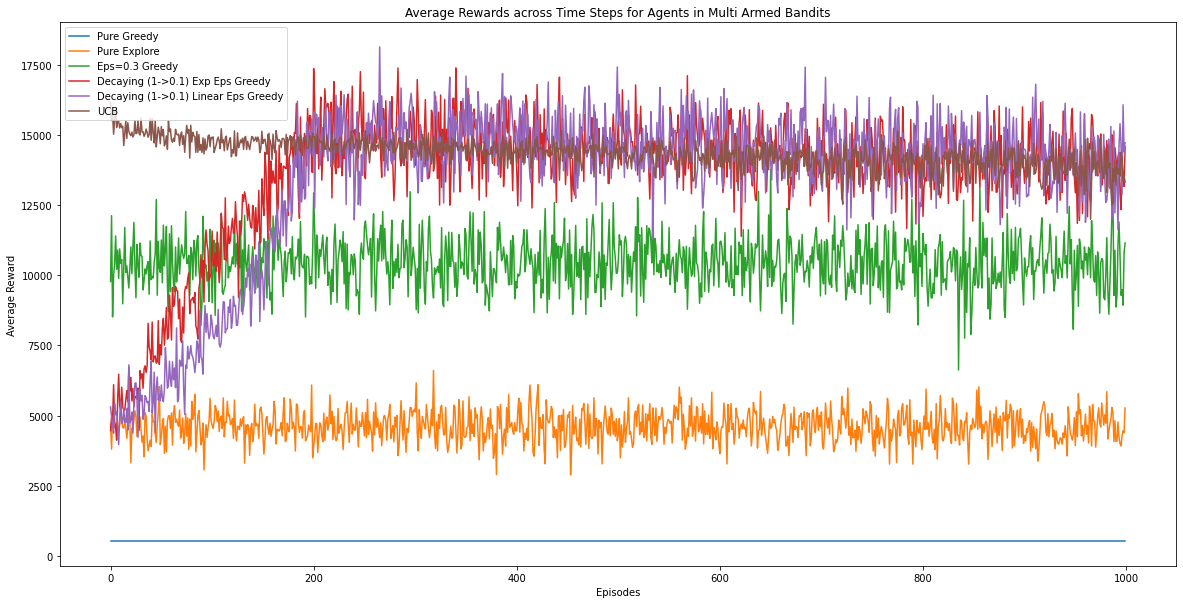

In [27]:
# decaying epsilon greedy, but decays till 200 episodes and constant afterwards
AvgRewardsNGaussianBandits(N=1, episodes=1000, block_type=1)

100%|██████████| 1/1 [03:02<00:00, 182.71s/it]


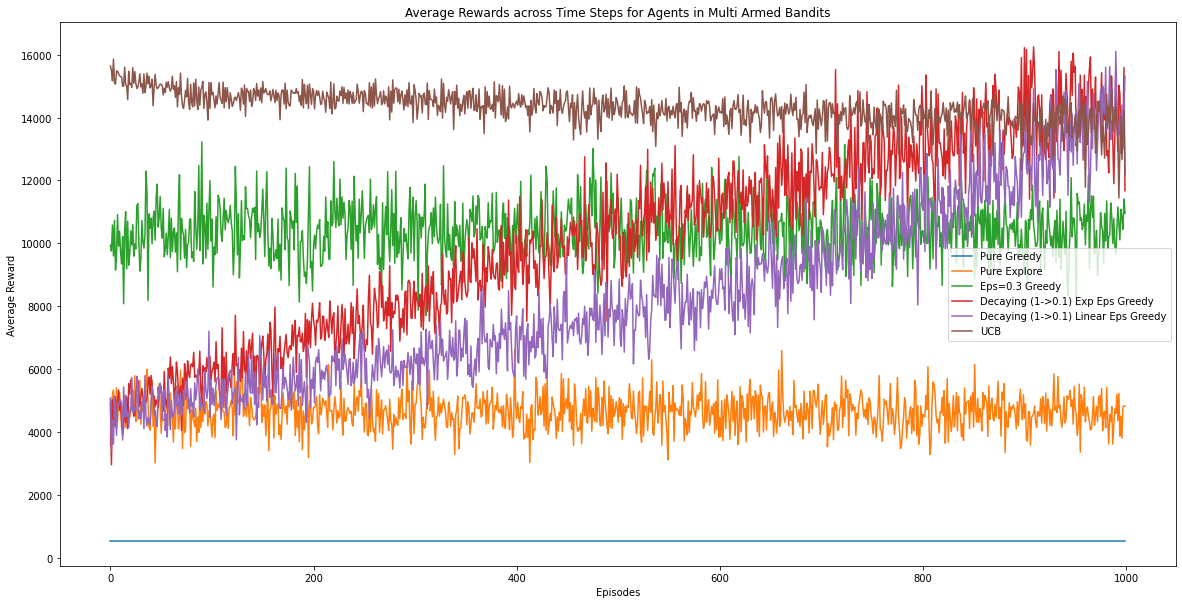

In [32]:
#decaying epsilon greedy, but decays to final value of 0.1 till the last episode
AvgRewardsNGaussianBandits(N=1, episodes=1000, block_type=1, decayTill=1000)

100%|██████████| 25/25 [13:25<00:00, 32.20s/it]


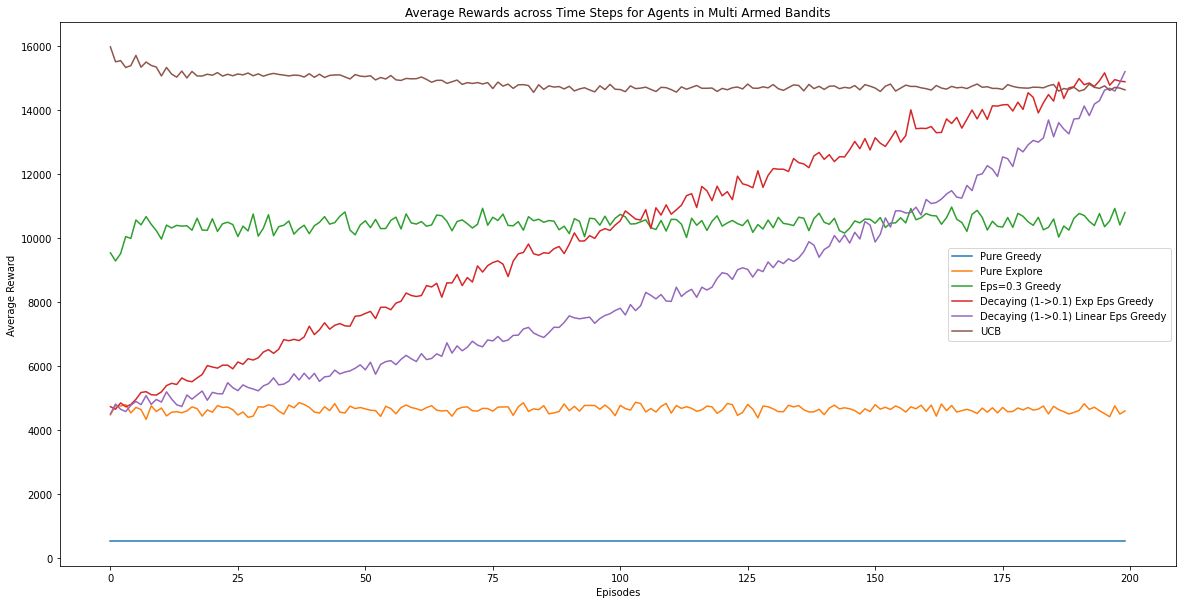

In [33]:
#decaying epsilon greedy, but decays to final value of 0.1 till the last episode
#also averaging
AvgRewardsNGaussianBandits(N=25, episodes=200, block_type=1, decayTill=200)

100%|██████████| 25/25 [09:19<00:00, 22.38s/it]


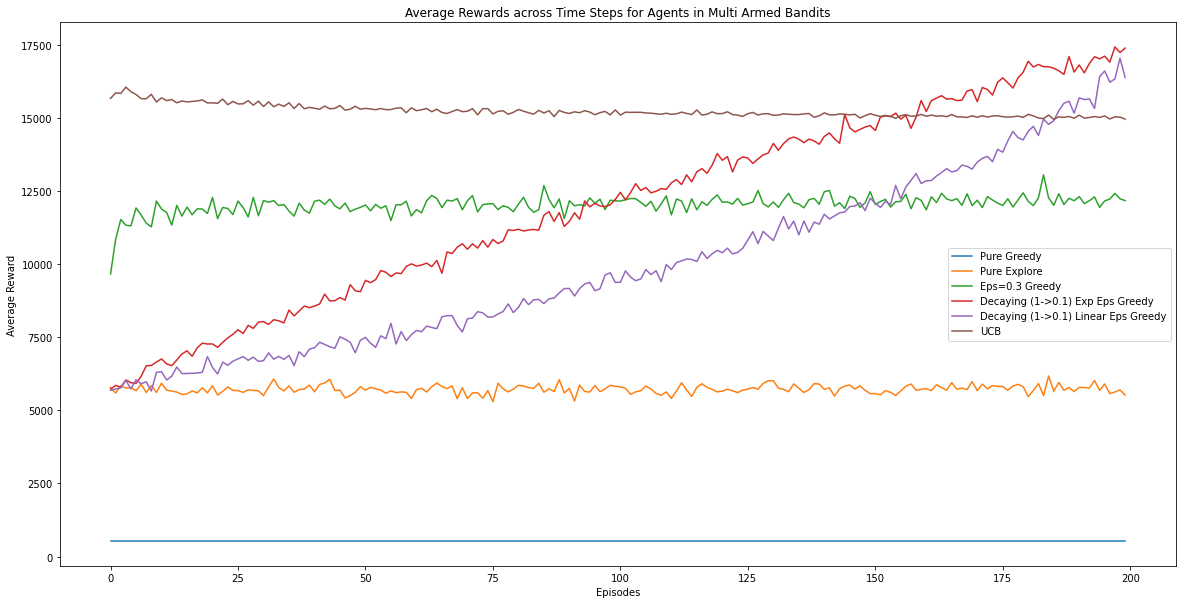

In [12]:
#decaying epsilon greedy, but decays to final value of 0.1 till the last episode
#also averaging
AvgRewardsNGaussianBandits(N=25, episodes=200, block_type=2)

100%|██████████| 25/25 [09:45<00:00, 23.42s/it]


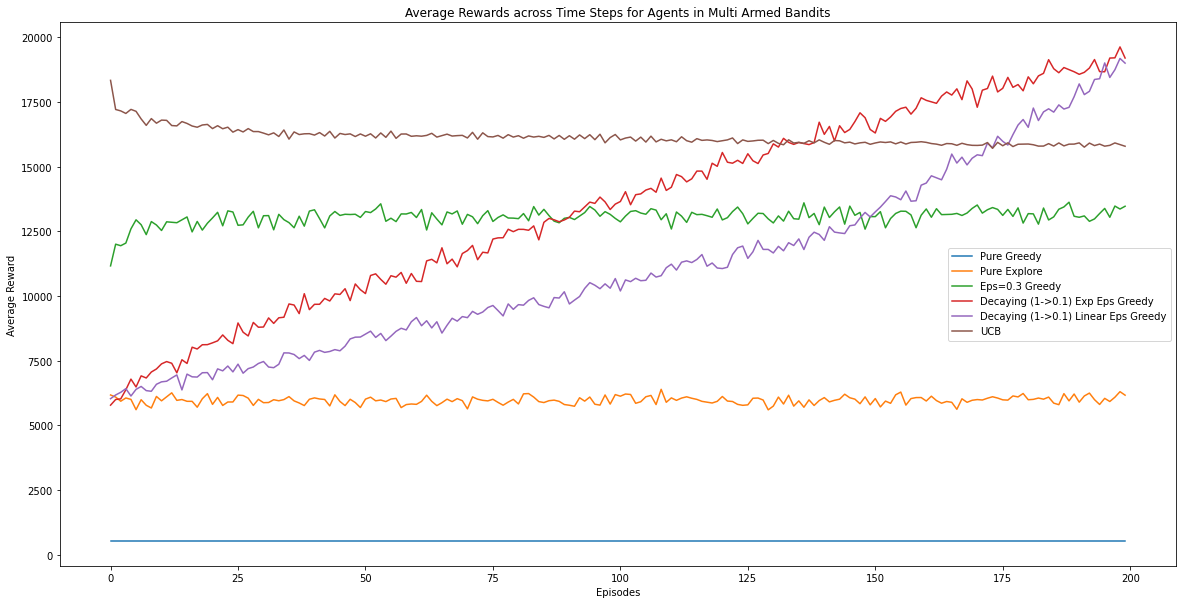

In [13]:
AvgRewardsNGaussianBandits(N=25, episodes=200, block_type=3)

100%|██████████| 10/10 [03:52<00:00, 23.26s/it]


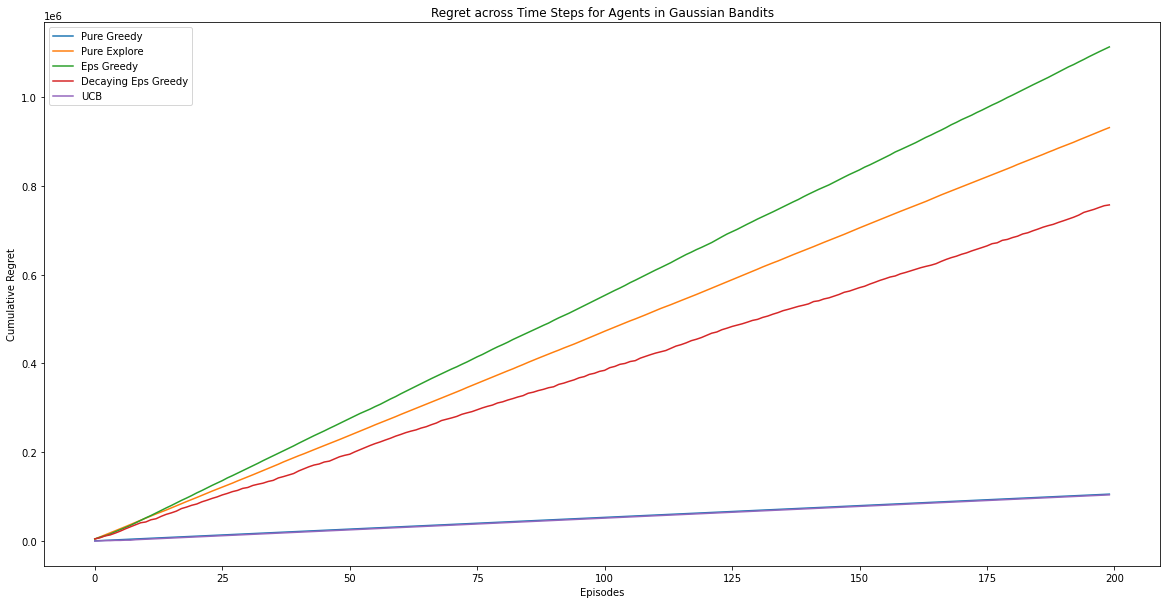

In [24]:
def RegretNGaussianBandits(N=50, episodes=10**3):
    pureGreedy_R = []
    pureExplore_R = []
    epsGreedy_R = []
    decEpsGreedy_R = []
    UCB_R = []
    softMax_R = []

    for i in tqdm(range(N)):
        genv = gym.make('foraging-replenishing-patches-v0')
        _,rs = pureGreedy(env=genv, maxEpisodes = episodes)
        pureGreedy_R.append(rs)
        _,rs = pureExplore(env=genv, maxEpisodes=episodes)
        pureExplore_R.append(rs)
        _,rs = epsGreedy(env=genv, maxEpisodes=episodes, eps=0.3)
        epsGreedy_R.append(rs)
        _,rs = decEpsGreedy(env=genv, maxEpisodes=episodes, eps_start=1, eps_end=0.0)
        decEpsGreedy_R.append(rs)
        _,rs = UCB(env=genv, maxEpisodes=episodes, c=0.5)
        UCB_R.append(rs)
        # _,rs = softMax(env=genv, maxEpisodes=episodes, temp_start=10**2, temp_end=0.01)
        # softMax_R.append(rs)
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.title("Regret across Time Steps for Agents in Gaussian Bandits")
    plt.xlabel('Episodes')
    plt.ylabel('Cumulative Regret') 
    plt.plot(np.arange(episodes), np.mean(np.cumsum(pureGreedy_R,axis=1),axis=0), label='Pure Greedy')
    plt.plot(np.arange(episodes), np.mean(np.cumsum(pureExplore_R,axis=1),axis=0), label='Pure Explore')
    plt.plot(np.arange(episodes), np.mean(np.cumsum(epsGreedy_R,axis=1),axis=0), label='Eps Greedy')
    plt.plot(np.arange(episodes), np.mean(np.cumsum(decEpsGreedy_R,axis=1),axis=0), label='Decaying Eps Greedy')
    plt.plot(np.arange(episodes), np.mean(np.cumsum(UCB_R,axis=1),axis=0), label='UCB')
    # plt.plot(np.arange(episodes), np.mean(np.cumsum(softMax_R,axis=1),axis=0), label='Soft Max')
    plt.legend()
    plt.show() 

RegretNGaussianBandits(N=10, episodes=200)